# Term frequency Inverse Document frequency (TFIDF)

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# load preprocessed text
review_data = pd.read_pickle("review_data.pkl")

In [4]:
# Stratified Test Train Spilt

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(review_data.Text,review_data.Sentiment,
                                                 test_size=0.3,stratify=review_data.Sentiment,random_state=42)
X_train.shape

(254914,)

In [5]:
# Creating TFIDF Features

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
final_counts = tfidf_vec.fit_transform(X_train)
print(final_counts.shape)

(254914, 96703)


In [6]:
# we use navie bayes as classifier because its known for its speed.
# here we need to perform several experiment to we go with speed rathar than accuracy
from sklearn.naive_bayes import MultinomialNB
clf =  MultinomialNB()
clf.fit(final_counts,y_train)
print(clf.score(final_counts,y_train))
X_test_bow = tfidf_vec.transform(X_test)
print(clf.score(X_test_bow,y_test))

0.8556454333618396
0.8513867276887872


In [7]:
# TFIDF row with non zero entry return row index, column index
final_counts[0,:].nonzero()


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=int32),
 array([93598, 91411, 86718, 77295, 52439, 93720, 87708, 55171, 80781,
        43875, 55386, 86696, 93382, 16309, 43874, 91874, 35557, 43667,
        87031, 94523, 29145, 15508, 82410, 47442, 59777, 64720],
       dtype=int32))

In [9]:
# look at some example
print(X_train.iloc[0])
# TFidf value of "We"
final_counts[0,93598]

We used the seasoning last weekend to make some hamburgers. Man, that was the best hamburger I've ever had! This will definitely be a staple in my pantry.


0.13741699990331868

In [10]:
# Checkout review with corresponding Tfidf value

tf_vocab=tfidf_vec.get_feature_names()
first_sentence =  [93598, 91411, 86718, 77295, 52439, 93720, 87708, 55171, 80781,
        43875, 55386, 86696, 93382, 16309, 43874, 91874, 35557, 43667,
        87031, 94523, 29145, 15508, 82410, 47442, 59777, 64720]
for value in first_sentence:
    print(tf_vocab[value],'\t\t\t',final_counts[0,value])

we 			 0.13741699990331868
used 			 0.15720499431001422
the 			 0.10890297208741082
seasoning 			 0.25888151501372736
last 			 0.19158338281996679
weekend 			 0.3293932269904595
to 			 0.0630690672213203
make 			 0.14558915778417017
some 			 0.13478660228671113
hamburgers 			 0.3767074432196095
man 			 0.2980132553368805
that 			 0.08696976286641608
was 			 0.09859527013104034
best 			 0.1416456275592033
hamburger 			 0.339940485540104
ve 			 0.1434246640619987
ever 			 0.17620823351560547
had 			 0.1272907654181933
this 			 0.06594541619363117
will 			 0.12431590678169643
definitely 			 0.18570717353790192
be 			 0.11085694952340505
staple 			 0.2871979652088317
in 			 0.07598041210316836
my 			 0.08032741882170304
pantry 			 0.2761146264606052


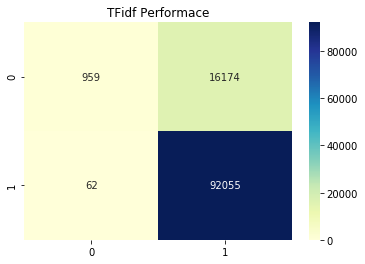

In [12]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_test,clf.predict(X_test_bow))
sns.heatmap(cnf,annot=True,fmt='g',cmap="YlGnBu");
plt.title("TFidf Performace");

**Conclusion** : TFIDF perform very poorly on our review dataset